In [42]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
# suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
# suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [43]:
predict_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_filt_allexpts_exprs_20180618.groupedby_exp_donor_day.tsv"

In [44]:
predict = read.csv(predict_filename, sep = "\t")
dim(predict)
predict[1:5,1:5]

[1]   517 11264

day  experiment donor n_cells ENSG00000000003_TSPAN6
1 day0 expt_12    heth   24     5.463205              
2 day0 expt_12    jogf  102     5.682049              
3 day0 expt_12    pelm   49     5.307400              
4 day0 expt_12    vass   31     5.506002              
5 day0 expt_12    wibj   28     6.365963

In [45]:
# colnames(predict)

In [46]:
colnames(predict)[grep("SOX2", colnames(predict))]

[1] "ENSG00000181449_SOX2"

In [47]:
SOX2_day0 = predict[predict$day == "day0",c('ENSG00000181449_SOX2','donor','experiment')]
SOX2_day1 = predict[predict$day == "day1",c('ENSG00000181449_SOX2','donor','experiment')]
pseudo_day3 = predict[predict$day == "day3",c('pseudotime','donor','experiment')]

In [48]:
dim(SOX2_day0)
dim(SOX2_day1)
dim(pseudo_day3)

[1] 136   3

[1] 138   3

[1] 127   3

In [49]:
sox <- inner_join(SOX2_day0, SOX2_day1, by = c("donor","experiment"), suffix = c(".day0",".day1"))
dim(sox)
head(sox)

[1] 120   4

ENSG00000181449_SOX2.day0 donor experiment ENSG00000181449_SOX2.day1
1 3.239798                  oaqd  expt_18    0.9015771                
2 3.056182                  paab  expt_18    0.7717140                
3 3.440543                  sita  expt_18    0.9092525                
4 2.956135                  toss  expt_18    1.4455209                
5 3.333734                  zoio  expt_18    0.9218679                
6 3.302341                  fasu  expt_20    0.4953410

In [50]:
df = inner_join(sox, pseudo_day3, by = c("donor","experiment"))
dim(df)
head(df)

[1] 104   5

ENSG00000181449_SOX2.day0 donor experiment ENSG00000181449_SOX2.day1
1 4.743870                  eoxi  expt_22    1.6192399                
2 5.141175                  fawm  expt_22    1.2008518                
3 5.661546                  iudw  expt_22    1.6025639                
4 4.539711                  oebj  expt_22    2.2904904                
5 4.991312                  oojs  expt_22    0.9876115                
6 5.616909                  pulk  expt_22    2.0315109                
  pseudotime
1 0.8028691 
2 0.7074314 
3 0.6711877 
4 0.6917951 
5 0.7616687 
6 0.6649738

In [51]:
col_day0 =  "#344d90"
col_day1 = "#5cc5ef"
col_day2 = "#ffb745"

In [52]:
p = ggplot(df, aes(x = ENSG00000181449_SOX2.day0, y = pseudotime)) + geom_point(alpha = 0.6, col = col_day0)
p = p + ylab("predicted: pseudotime day3") + xlab("predictor: SOX2 day0") 
corr_text = paste0("corr: ", round(cor(df$ENSG00000181449_SOX2.day0, df$pseudotime),digits = 2))
# p = p + ggtitle(corr_text)
p <- p + annotate("text", x = 2.5, y = 0.6, label = corr_text, col = col_day0)
p = p + stat_smooth(colour = col_day0, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_classic()

In [53]:
p = ggplot(df, aes(x = ENSG00000181449_SOX2.day1, y = pseudotime)) + geom_point(alpha = 0.6, col = col_day1)
p = p + ylab("predicted: pseudotime day3") + xlab("predictor: SOX2 day1")
corr_text = paste0("corr: ", round(cor(df$ENSG00000181449_SOX2.day1, df$pseudotime),digits = 2))
# p = p + ggtitle(corr_text)
p <- p + annotate("text", x = 0.5, y = 0.6, label = corr_text, col = col_day1)
p = p + stat_smooth(colour = col_day1, linetype = 2, method = "lm", alpha = 0.05) 
# p = p + theme_bw() + theme(panel.border = element_blank())
p2 = p + theme_classic()

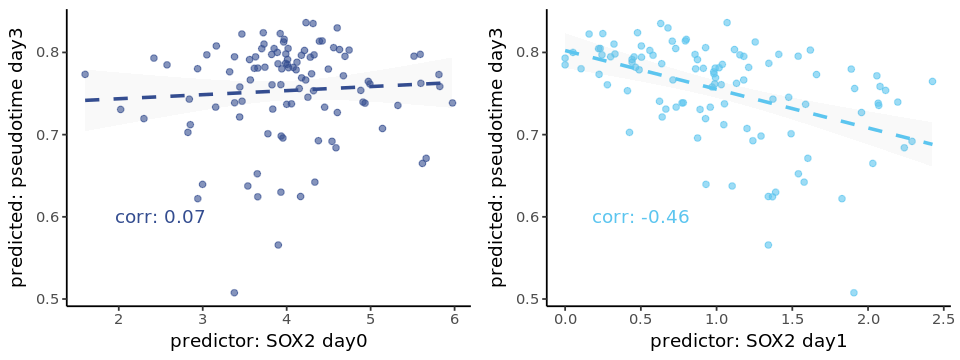

In [54]:
options(repr.plot.width = 8, repr.plot.height = 3)
plot_grid(p1, p2, ncol = 2)

In [55]:
T_day0 = predict[predict$day == "day0",c('ENSG00000164458_T','donor','experiment')]
T_day1 = predict[predict$day == "day1",c('ENSG00000164458_T','donor','experiment')]
T_day2 = predict[predict$day == "day2",c('ENSG00000164458_T','donor','experiment')]
pseudo_day3 = predict[predict$day == "day3",c('pseudotime','donor','experiment')]

In [56]:
t <- inner_join(T_day0, T_day1, by = c("donor","experiment"), suffix = c(".day0",".day1"))
head(t)

ENSG00000164458_T.day0 donor experiment ENSG00000164458_T.day1
1 0.09051909             oaqd  expt_18    4.556292              
2 0.00000000             paab  expt_18    4.854303              
3 0.00000000             sita  expt_18    5.146358              
4 0.00000000             toss  expt_18    4.728730              
5 0.00000000             zoio  expt_18    5.608309              
6 0.00000000             fasu  expt_20    4.990195

In [57]:
brach = inner_join(t, T_day2, by = c("donor","experiment"))
colnames(brach)[5] = paste0(colnames(brach)[5],".day2")
head(brach)

ENSG00000164458_T.day0 donor experiment ENSG00000164458_T.day1
1 0.00000000             eoxi  expt_22    4.517636              
2 0.02789847             fawm  expt_22    3.792355              
3 0.00000000             iudw  expt_22    4.931161              
4 0.07835498             oebj  expt_22    5.419036              
5 0.00000000             oojs  expt_22    5.621357              
6 0.00000000             pulk  expt_22    4.907856              
  ENSG00000164458_T.day2
1 1.3871071             
2 0.2168827             
3 0.7934825             
4 0.3919548             
5 0.5342721             
6 1.7253532

In [58]:
df = inner_join(brach, pseudo_day3, by = c("donor","experiment"))
dim(df)
head(df)

[1] 88  6

ENSG00000164458_T.day0 donor experiment ENSG00000164458_T.day1
1 0.00000000             eoxi  expt_22    4.517636              
2 0.02789847             fawm  expt_22    3.792355              
3 0.00000000             iudw  expt_22    4.931161              
4 0.07835498             oebj  expt_22    5.419036              
5 0.00000000             oojs  expt_22    5.621357              
6 0.00000000             pulk  expt_22    4.907856              
  ENSG00000164458_T.day2 pseudotime
1 1.3871071              0.8028691 
2 0.2168827              0.7074314 
3 0.7934825              0.6711877 
4 0.3919548              0.6917951 
5 0.5342721              0.7616687 
6 1.7253532              0.6649738

In [59]:
p = ggplot(df, aes(x = ENSG00000164458_T.day0, y = pseudotime)) + geom_point(alpha = 0.6, col = col_day0)
p = p + ylab("predicted: pseudo day3") + xlab("predictor: T day0") 
corr_text = paste0("corr: ", round(cor(df$ENSG00000164458_T.day0, df$pseudotime),digits = 2))
# p = p + ggtitle(corr_text)
p <- p + annotate("text", x = 0.45, y = 0.6, label = corr_text, col = col_day0)
p = p + stat_smooth(colour = col_day0, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_classic()

In [60]:
p = ggplot(df, aes(x = ENSG00000164458_T.day1, y = pseudotime)) + geom_point(alpha = 0.6, col = col_day1)
p = p + ylab("predicted: pseudo day3") + xlab("predictor: T day1")
corr_text = paste0("corr: ", round(cor(df$ENSG00000164458_T.day1, df$pseudotime),digits = 2))
# p = p + ggtitle(corr_text)
p <- p + annotate("text", x = 7.2, y = 0.6, label = corr_text, col = col_day1)
p = p + stat_smooth(colour = col_day1, linetype = 2, method = "lm", alpha = 0.05) 
# p = p + theme_bw() + theme(panel.border = element_blank())
p2 = p + theme_classic()

In [61]:
p = ggplot(df, aes(x = ENSG00000164458_T.day2, y = pseudotime)) + geom_point(alpha = 0.6, col = col_day2)
p = p + ylab("predicted: pseudo day3") + xlab("predictor: T day2")
corr_text = paste0("corr: ", round(cor(df$ENSG00000164458_T.day2, df$pseudotime),digits = 2))
# p = p + ggtitle(corr_text)
p <- p + annotate("text", x = 2.2, y = 0.8, label = corr_text, col = col_day2)
p = p + stat_smooth(colour = col_day2, linetype = 2, method = "lm", alpha = 0.05) 
# p = p + theme_bw() + theme(panel.border = element_blank())
p3 = p + theme_classic()

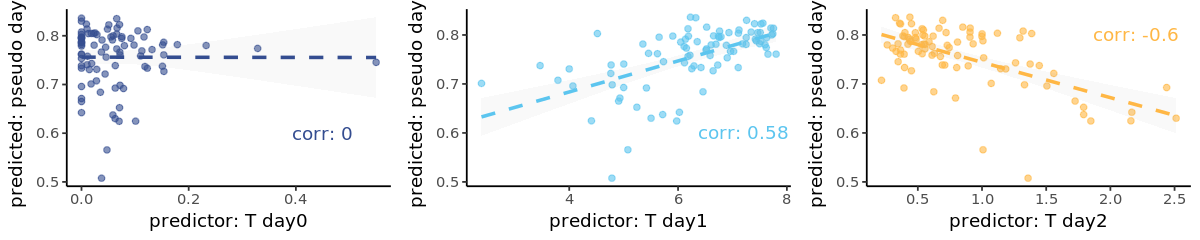

In [62]:
options(repr.plot.width = 10, repr.plot.height = 2)
plot_grid(p1, p2, p3,ncol = 3)

In [63]:
predict_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results_selected_markers_data/"

In [64]:
tests = read.csv(paste0(predict_folder, "test_results.tsv"), sep = "\t")
head(tests)

timepoint1 gene1      timepoint2 gene2      coefficient pval        
1 day2       pseudotime day3       pseudotime  0.45514869 2.521506e-11
2 day2       NANOG      day3       pseudotime -0.03843010 2.797062e-09
3 day2       GATA6      day3       pseudotime  0.03138475 4.638677e-09
4 day1       DKK1       day3       pseudotime  0.01381831 5.385268e-08
5 day2       SOX2       day3       pseudotime -0.05140022 4.866488e-07
6 day2       EOMES      day3       pseudotime  0.03864793 7.024248e-06

In [65]:
day0_file = read.csv(paste0(predict_folder, "day0_SOX2_day3_pseudotime.tsv"), sep = "\t")
head(day0_file)

experiment donor phenotype fixed_effect residual    
1 expt_22    eoxi  0.8028691 4.743870      0.016888133
2 expt_22    fawm  0.7074314 5.141175     -0.002927534
3 expt_22    iudw  0.6711877 5.661546     -0.010452791
4 expt_22    oebj  0.6917951 4.539711     -0.006174083
5 expt_22    oojs  0.7616687 4.991312      0.008333726
6 expt_22    pulk  0.6649738 5.616909     -0.008964453

In [66]:
day0_file = read.csv(paste0(predict_folder, "day0_SOX2_day3_pseudotime.tsv"), sep = "\t")
col = "#344d90"
p = ggplot(day0_file, aes(x = fixed_effect, y = phenotype)) + geom_point(alpha = 0.6, col = col)
p = p + ylab("predicted: pseudo day3") + xlab("predictor: SOX2 day0") 
corr_text = paste0("corr: ", round(cor(day0_file$fixed_effect, day0_file$phenotype),digits = 2))
p <- p + annotate("text", x = 2.7, y = 0.55, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_classic()


p = ggplot(day0_file, aes(x = residual, y = phenotype)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("residual") + ylab("predicted: pseudo day3") 
corr_text = paste0("corr: ", round(cor(day0_file$residual, day0_file$phenotype),digits = 2))
p <- p + annotate("text", x = 0.01, y = 0.55, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p2 = p + theme_classic()


p = ggplot(day0_file, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("predictor: SOX2 day0") + ylab("residual") 
corr_text = paste0("corr: ", round(cor(day0_file$fixed_effect, day0_file$residual),digits = 2))
p <- p + annotate("text",  x = 2.7, y = -0.02, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p3 = p + theme_classic()
options(repr.plot.width = 9, repr.plot.height = 3)
# plot_grid(p1, p2, p3, ncol = 3)

In [67]:
day1_file = read.csv(paste0(predict_folder, "day1_SOX2_day3_pseudotime.tsv"), sep = "\t")
col = "#5cc5ef"
df = day1_file
p = ggplot(df, aes(x = fixed_effect, y = phenotype)) + geom_point(alpha = 0.6, col = col)
p = p + ylab("predicted: pseudo day3") + xlab("predictor: SOX2 day1") 
corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$phenotype),digits = 2))
p <- p + annotate("text", x = 0.5, y = 0.55, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_classic()

p = ggplot(df, aes(x = residual, y = phenotype)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("residual") + ylab("predicted: pseudo day3") 
corr_text = paste0("corr: ", round(cor(df$residual, df$phenotype),digits = 2))
p <- p + annotate("text", x = 0.01, y = 0.55, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p2 = p + theme_classic()


p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("predictor: SOX2 day1") + ylab("residual") 
corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
p <- p + annotate("text",  x = 0.5, y = -0.022, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p3 = p + theme_classic()
options(repr.plot.width = 9, repr.plot.height = 3)
# plot_grid(p1, p2, p3, ncol = 3)

In [68]:
day2_file = read.csv(paste0(predict_folder, "day2_SOX2_day3_pseudotime.tsv"), sep = "\t")
col = "#ffb745"
df = day2_file
p = ggplot(df, aes(x = fixed_effect, y = phenotype)) + geom_point(alpha = 0.6, col = col)
p = p + ylab("predicted: pseudo day3") + xlab("predictor: SOX2 day2") 
corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$phenotype),digits = 2))
p <- p + annotate("text", x = 0.5, y = 0.55, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_classic()


p = ggplot(df, aes(x = residual, y = phenotype)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("residual") + xlab("predicted: pseudo day3") 
corr_text = paste0("corr: ", round(cor(df$residual, df$phenotype),digits = 2))
p <- p + annotate("text", x = 0.005, y = 0.55, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p2 = p + theme_classic()


p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("predictor: SOX2 day2") + ylab("residual") 
corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
p <- p + annotate("text",  x = 0.5, y = -0.015, label = corr_text, col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p3 = p + theme_classic()
options(repr.plot.width = 9, repr.plot.height = 3)
# plot_grid(p1, p2, p3, ncol = 3)

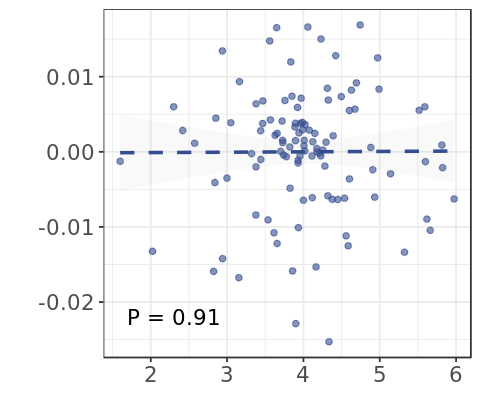

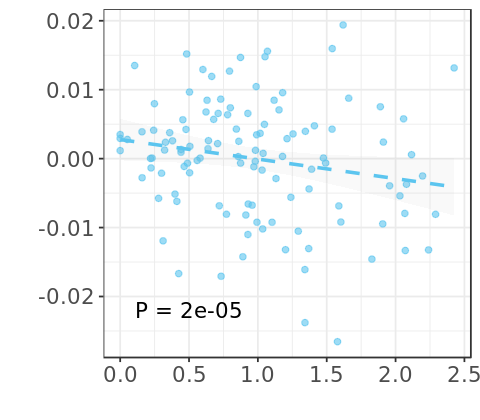

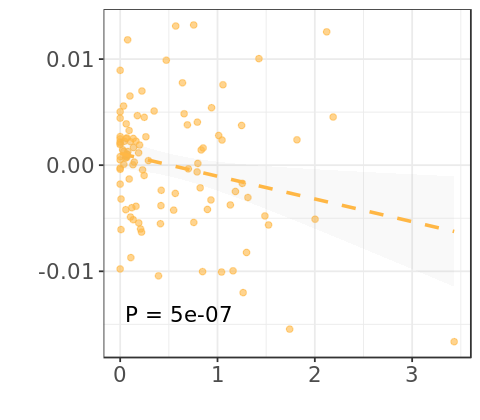

In [69]:
day0_file = read.csv(paste0(predict_folder, "day0_SOX2_day3_pseudotime.tsv"), sep = "\t")
col = "#344d90"
df = day0_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("")# + ylab("pseudotime day3 \n(corrected)") 
p = p + ylab("")
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 2.3, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day0" & tests$gene1 == "SOX2" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 2.3, y = -0.022, label = paste0("P = ",round(pval, digits = 2)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw() #+ ggtitle("day0")
p1 = p + theme(plot.title = element_text(hjust = 0.5, colour = col),
               text = element_text(size = 16))
##
day1_file = read.csv(paste0(predict_folder, "day1_SOX2_day3_pseudotime.tsv"), sep = "\t")
col = "#5cc5ef"
df = day1_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("") + ylab("") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.5, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day1" & tests$gene1 == "SOX2" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 0.5, y = -0.022, label = paste0("P = ",round(pval, digits = 5)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw()  
# p = p + ggtitle("day1") 
p2 = p + theme(plot.title = element_text(hjust = 0.5, colour = col), text = element_text(size = 16))
##
day2_file = read.csv(paste0(predict_folder, "day2_SOX2_day3_pseudotime.tsv"), sep = "\t")
col = "#ffb745"
df = day2_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("") + ylab("") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.6, y = -0.014, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day2" & tests$gene1 == "SOX2" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 0.6, y = -0.014, label = paste0("P = ",round(pval, digits = 7)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw() 
# p = p + ggtitle("day2") 
p3 = p + theme(plot.title = element_text(hjust = 0.5, colour = col), text = element_text(size = 16))
##
options(repr.plot.width = 4, repr.plot.height = 3.5)
p1
p2
p3
# plot_grid(p1, p2, p3, ncol = 3)

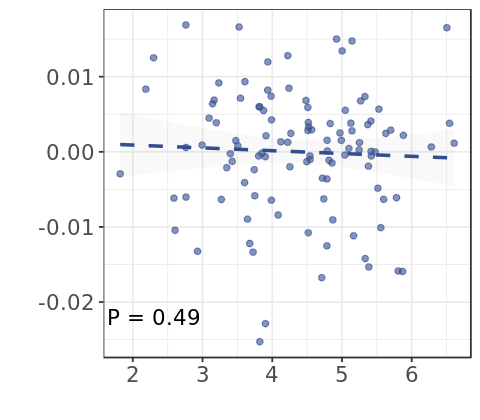

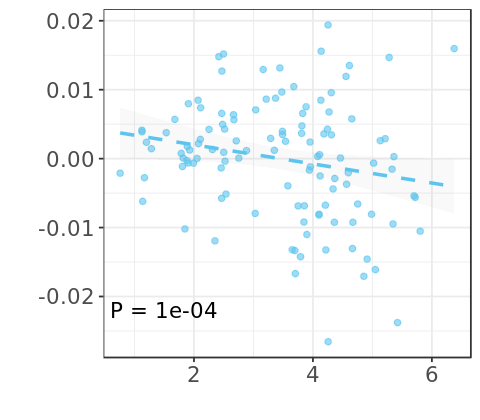

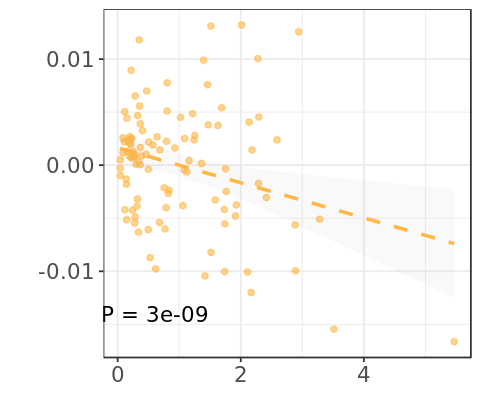

In [70]:
day0_file = read.csv(paste0(predict_folder, "day0_NANOG_day3_pseudotime.tsv"), sep = "\t")
col = "#344d90"
df = day0_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("")# + ylab("pseudotime day3 \n(corrected)") 
p = p + ylab("")
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 2.3, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day0" & tests$gene1 == "NANOG" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 2.3, y = -0.022, label = paste0("P = ",round(pval, digits = 2)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw() #+ ggtitle("day0")
p1 = p + theme(plot.title = element_text(hjust = 0.5, colour = col),
               text = element_text(size = 16))
##
day1_file = read.csv(paste0(predict_folder, "day1_NANOG_day3_pseudotime.tsv"), sep = "\t")
col = "#5cc5ef"
df = day1_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("") + ylab("") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.5, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day1" & tests$gene1 == "NANOG" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 1.5, y = -0.022, label = paste0("P = ",round(pval, digits = 4)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw()  
# p = p + ggtitle("day1") 
p2 = p + theme(plot.title = element_text(hjust = 0.5, colour = col), text = element_text(size = 16))
##
day2_file = read.csv(paste0(predict_folder, "day2_NANOG_day3_pseudotime.tsv"), sep = "\t")
col = "#ffb745"
df = day2_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("") + ylab("") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.6, y = -0.014, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day2" & tests$gene1 == "NANOG" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 0.6, y = -0.014, label = paste0("P = ",round(pval, digits = 9)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw() 
# p = p + ggtitle("day2") 
p3 = p + theme(plot.title = element_text(hjust = 0.5, colour = col), text = element_text(size = 16))
##
options(repr.plot.width = 4, repr.plot.height = 3.5)
p1
p2
p3
# plot_grid(p1, p2, p3, ncol = 3)

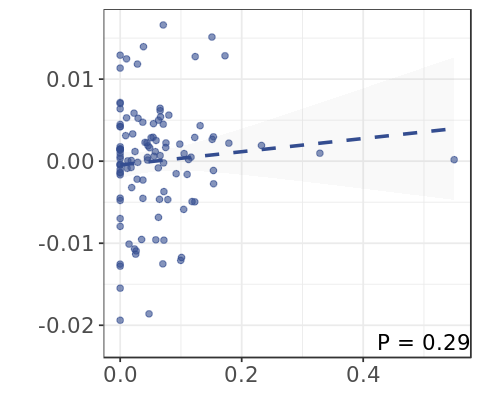

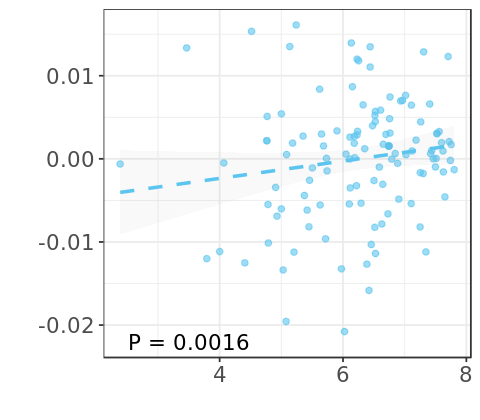

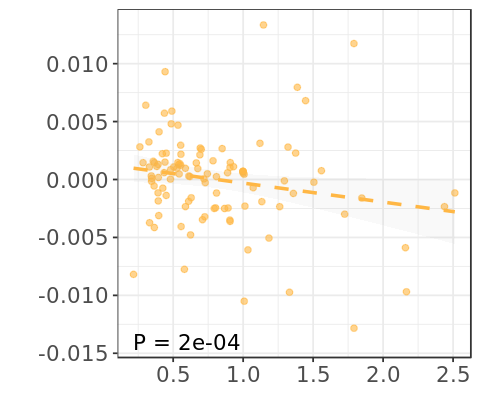

In [71]:
day0_file = read.csv(paste0(predict_folder, "day0_T_day3_pseudotime.tsv"), sep = "\t")
col = "#344d90"
df = day0_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("")# + ylab("pseudotime day3 \n(corrected)") 
p = p + ylab("")
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 2.3, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day0" & tests$gene1 == "T" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 0.5, y = -0.022, label = paste0("P = ",round(pval, digits = 2)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw() #+ ggtitle("day0")
p1 = p + theme(plot.title = element_text(hjust = 0.5, colour = col),
               text = element_text(size = 16))
##
day1_file = read.csv(paste0(predict_folder, "day1_T_day3_pseudotime.tsv"), sep = "\t")
col = "#5cc5ef"
df = day1_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("") + ylab("") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.5, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day1" & tests$gene1 == "T" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 3.5, y = -0.022, label = paste0("P = ",round(pval, digits = 4)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw()  
# p = p + ggtitle("day1") 
p2 = p + theme(plot.title = element_text(hjust = 0.5, colour = col), text = element_text(size = 16))
##
day2_file = read.csv(paste0(predict_folder, "day2_T_day3_pseudotime.tsv"), sep = "\t")
col = "#ffb745"
df = day2_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("") + ylab("") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.6, y = -0.014, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day2" & tests$gene1 == "T" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 0.6, y = -0.014, label = paste0("P = ",round(pval, digits = 4)), size = 4.5)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p = p + theme_bw() 
# p = p + ggtitle("day2") 
p3 = p + theme(plot.title = element_text(hjust = 0.5, colour = col), text = element_text(size = 16))
##
options(repr.plot.width = 4, repr.plot.height = 3.5)
p1
p2
p3
# plot_grid(p1, p2, p3, ncol = 3)

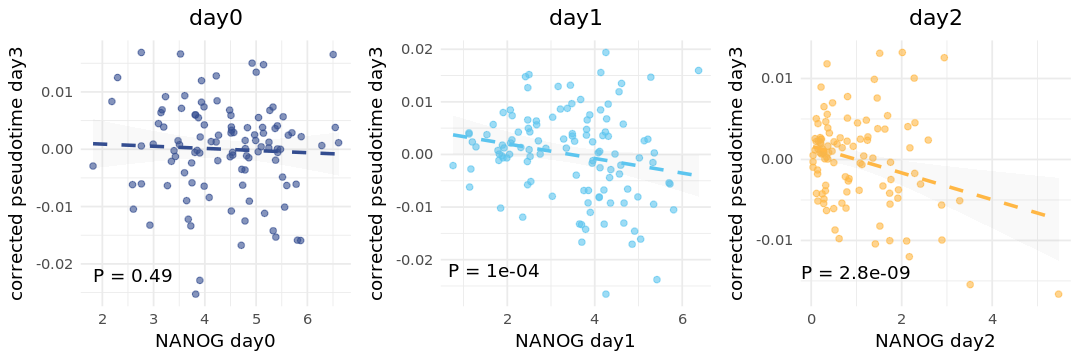

In [72]:
day0_file = read.csv(paste0(predict_folder, "day0_NANOG_day3_pseudotime.tsv"), sep = "\t")
col = "#344d90"
df = day0_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("NANOG day0") + ylab("corrected pseudotime day3") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 2.6, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day0" & tests$gene1 == "NANOG" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 2.6, y = -0.022, label = paste0("P = ",round(pval, digits = 2)))
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_minimal() + ggtitle("day0") + theme(plot.title = element_text(hjust = 0.5))
##
day1_file = read.csv(paste0(predict_folder, "day1_NANOG_day3_pseudotime.tsv"), sep = "\t")
col = "#5cc5ef"
df = day1_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("NANOG day1") + ylab("corrected pseudotime day3") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 1.7, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day1" & tests$gene1 == "NANOG" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 1.7, y = -0.022, label = paste0("P = ",round(pval, digits = 4)))
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p2 = p + theme_minimal() + ggtitle("day1") + theme(plot.title = element_text(hjust = 0.5))
##
day2_file = read.csv(paste0(predict_folder, "day2_NANOG_day3_pseudotime.tsv"), sep = "\t")
col = "#ffb745"
df = day2_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("NANOG day2") + ylab("corrected pseudotime day3") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 1, y = -0.014, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day2" & tests$gene1 == "NANOG" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 1, y = -0.014, label = paste0("P = ",round(pval, digits = 10)))
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p3 = p + theme_minimal() + ggtitle("day2") + theme(plot.title = element_text(hjust = 0.5))
##
options(repr.plot.width = 9, repr.plot.height = 3)
plot_grid(p1, p2, p3, ncol = 3)

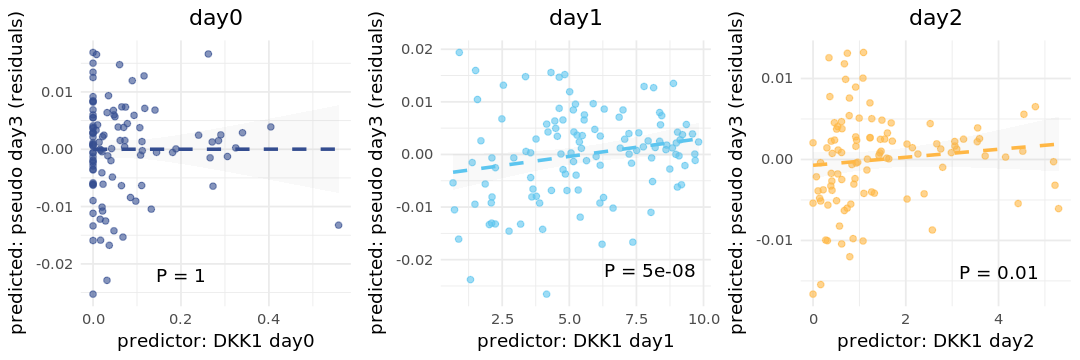

In [73]:
day0_file = read.csv(paste0(predict_folder, "day0_DKK1_day3_pseudotime.tsv"), sep = "\t")
col = "#344d90"
df = day0_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("predictor: DKK1 day0") + ylab("predicted: pseudo day3 (residuals)") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 0.2, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day0" & tests$gene1 == "DKK1" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 0.2, y = -0.022, label = paste0("P = ",round(pval, digits = 2)))
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p1 = p + theme_minimal() + ggtitle("day0") + theme(plot.title = element_text(hjust = 0.5))
##
day1_file = read.csv(paste0(predict_folder, "day1_DKK1_day3_pseudotime.tsv"), sep = "\t")
col = "#5cc5ef"
df = day1_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("predictor: DKK1 day1") + ylab("predicted: pseudo day3 (residuals)") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 8, y = -0.022, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day1" & tests$gene1 == "DKK1" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 8, y = -0.022, label = paste0("P = ",round(pval, digits = 8)))
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p2 = p + theme_minimal() + ggtitle("day1") + theme(plot.title = element_text(hjust = 0.5))
##
day2_file = read.csv(paste0(predict_folder, "day2_DKK1_day3_pseudotime.tsv"), sep = "\t")
col = "#ffb745"
df = day2_file
p = ggplot(df, aes(x = fixed_effect, y = residual)) + geom_point(alpha = 0.6, col = col)
p = p + xlab("predictor: DKK1 day2") + ylab("predicted: pseudo day3 (residuals)") 
# corr_text = paste0("corr: ", round(cor(df$fixed_effect, df$residual),digits = 2))
# p <- p + annotate("text",  x = 4, y = -0.014, label = corr_text, col = col)
pval = tests[tests$timepoint1 == "day2" & tests$gene1 == "DKK1" & tests$timepoint2 == "day3" & 
            tests$gene2 == "pseudotime","pval"]
p <- p + annotate("text",  x = 4, y = -0.014, label = paste0("P = ",round(pval, digits = 2)))
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05) 
p3 = p + ggtitle("day2") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
##
options(repr.plot.width = 9, repr.plot.height = 3)
plot_grid(p1, p2, p3, ncol = 3)

In [74]:
head(tests)

timepoint1 gene1      timepoint2 gene2      coefficient pval        
1 day2       pseudotime day3       pseudotime  0.45514869 2.521506e-11
2 day2       NANOG      day3       pseudotime -0.03843010 2.797062e-09
3 day2       GATA6      day3       pseudotime  0.03138475 4.638677e-09
4 day1       DKK1       day3       pseudotime  0.01381831 5.385268e-08
5 day2       SOX2       day3       pseudotime -0.05140022 4.866488e-07
6 day2       EOMES      day3       pseudotime  0.03864793 7.024248e-06

In [75]:
tests0 = tests[tests$timepoint1 == "day0" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests1 = tests[tests$timepoint1 == "day1" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests2 = tests[tests$timepoint1 == "day2" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]

In [76]:
df0 = inner_join(tests0, tests1, by = c("gene1","timepoint2","gene2"), suffix = c(".day0",".day1"))
df = inner_join(df0, tests2, by = c("gene1","timepoint2","gene2"))
colnames(df)[(ncol(df)-2):ncol(df)] <- c("timepoint1.day2","coefficient.day2","pval.day2")
head(df)

timepoint1.day0 gene1      timepoint2 gene2      coefficient.day0 pval.day0 
1 day0            CXCR4      day3       pseudotime -0.050636457     0.01872756
2 day0            SOX17      day3       pseudotime -0.244812065     0.02226053
3 day0            T          day3       pseudotime  0.063081015     0.29193878
4 day0            NANOG      day3       pseudotime -0.003358175     0.49386739
5 day0            pseudotime day3       pseudotime -0.079514107     0.55822026
6 day0            GATA6      day3       pseudotime  0.041952833     0.56677793
  timepoint1.day1 coefficient.day1 pval.day1    timepoint1.day2
1 day1            -0.02289775      4.553970e-01 day2           
2 day1             0.03322365      3.818626e-01 day2           
3 day1             0.01658328      1.648517e-03 day2           
4 day1            -0.01575165      1.441731e-04 day2           
5 day1             0.33042836      3.983100e-04 day2           
6 day1             0.01861724      7.051196e-06 day2           
  coefficient.day2 pval.day2   
1  0.004708433     3.520249e-01
2  0.006186556     3.441315e-02
3 -0.039291790     1.876807e-04
4 -0.038430099     2.797062e-09
5  0.455148693     2.521506e-11
6  0.031384747     4.638677e-09

In [77]:
mat = -log10(df[,c("pval.day0","pval.day1","pval.day2")])*sign(df[,c("coefficient.day0","coefficient.day1","coefficient.day2")])
rownames(mat) = df$gene1
colnames(mat) = c("day0", "day1", "day2")
t(mat)

CXCR4      SOX17      T          NANOG      pseudotime GATA6    
day0 -1.7275187 -1.6524644  0.5347082 -0.3063896 -0.2531944 0.2465871
day1 -0.3416098  0.4180929  2.7829066 -3.8411157  3.3997788 5.1517372
day2  0.4534267  1.4632755 -3.7265803 -8.5532979 10.5983401 8.3336058
     MIXL1      EOMES     SOX2       DKK1       
day0 -0.2079614 0.1546067  0.0396782 0.002109188
day1  3.3045893 1.4164405 -4.7718592 7.268792715
day2  0.7354517 5.1534002 -6.3127844 1.940962168

In [78]:
# mat_scaled = t(apply(mat, 1, scale))

In [79]:
library(colorspace)

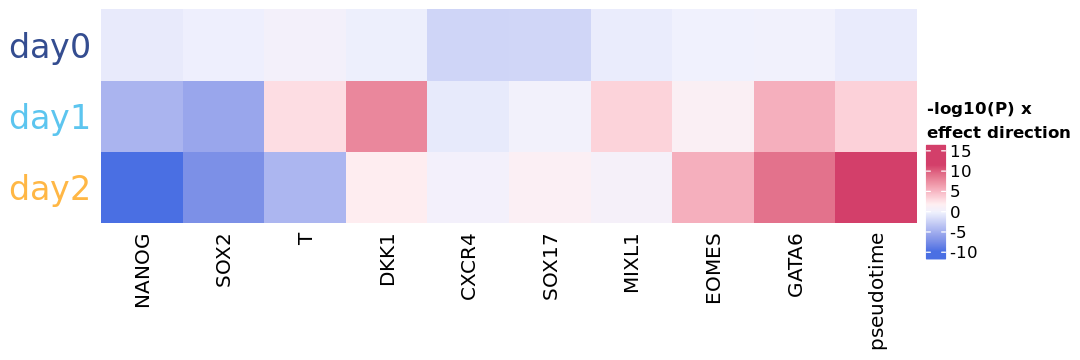

In [80]:
Heatmap(t(mat), 
        show_row_dend = F, show_column_dend = F, 
        show_column_names = T, show_row_names = T, 
        cluster_rows = F,  row_names_side = "left",
        name = "-log10(P) x \neffect direction",
        row_names_gp = gpar(col = c("#344d90", "#5cc5ef","#ffb745"), fontsize = 20),
        col = diverge_hcl(12, c = 100, l = c(50,100), power = 1))

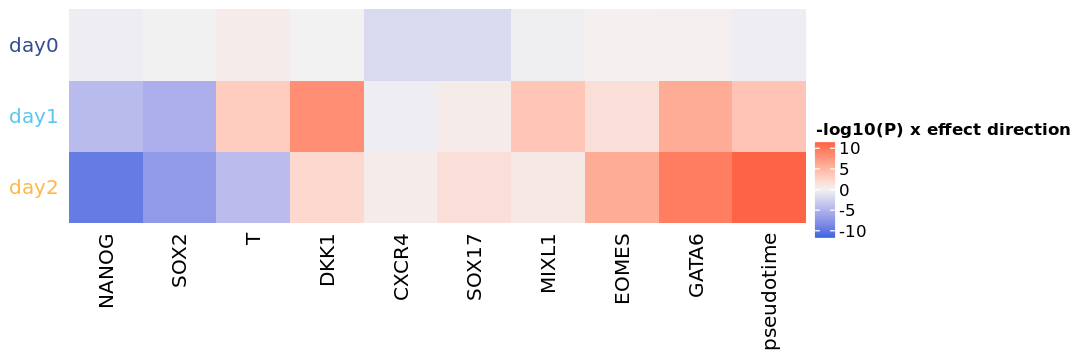

In [81]:
Heatmap(t(mat), 
        show_row_dend = F, show_column_dend = F, 
        show_column_names = T, show_row_names = T, 
        cluster_rows = F,  row_names_side = "left",
        name = "-log10(P) x effect direction", 
        row_names_gp = gpar(col = c("#344d90", "#5cc5ef","#ffb745")),
        col = colorRamp2(c(-10, 0, 10), c("royalblue", "gray95", "tomato")))
#         col = diverge_hcl(12, c = 100, l = c(30,100), power = 1))

In [82]:
x_chrom_predict_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_results.transcriptome_wide_scan_PC1.tsv"
x_chrom_predict_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results.transcriptome_wide_scan_pseudotime.tsv"
x_chrom_predict = read.csv(x_chrom_predict_filename, sep = "\t")
head(x_chrom_predict)

timepoint1 gene1                timepoint2 gene2      coefficient
1 day1       princ_curve_scaled01 day1       pseudotime 1.1162632  
2 day2       princ_curve_scaled01 day2       pseudotime 0.9952129  
3 day0       princ_curve_scaled01 day0       pseudotime 0.8314005  
4 day1       princ_curve_frac     day1       pseudotime 0.1901435  
5 day2       pseudotime_frac      day2       pseudotime 0.4731245  
6 day2       princ_curve_frac     day2       pseudotime 0.5812520  
  pval        
1 2.591249e-87
2 6.260132e-74
3 4.829511e-63
4 7.754403e-60
5 1.293367e-47
6 8.365894e-43

In [83]:
x_chrom_predict_day0 = x_chrom_predict[x_chrom_predict$timepoint1 == "day0",]
head(x_chrom_predict_day0)

timepoint1 gene1                timepoint2 gene2      coefficient
3  day0       princ_curve_scaled01 day0       pseudotime  0.83140050
7  day0       CYP2S1               day0       pseudotime -0.04932352
11 day0       EPCAM                day0       pseudotime -0.04283087
13 day0       SPINT2               day0       pseudotime -0.07010841
21 day0       NPM1                 day0       pseudotime -0.13692310
22 day0       DMKN                 day0       pseudotime -0.05471298
   pval        
3  4.829511e-63
7  8.448044e-41
11 2.893470e-37
13 1.164982e-36
21 7.212600e-31
22 1.449391e-30

In [84]:
x_chrom_predict_day0$hgnc_symbol = x_chrom_predict_day0$gene1

In [85]:
predict_filename = paste0(new_folder,"pseudotime_association_tests_transcriptome_wide_all_day_combinations.tsv")
predict = read.csv(predict_filename, sep = "\t")
head(predict,2)

timepoint1 gene1                timepoint2 gene2      coefficient
1 day1       princ_curve_scaled01 day1       pseudotime 1.1162632  
2 day2       princ_curve_scaled01 day2       pseudotime 0.9952129  
  pval        
1 2.591249e-87
2 6.260132e-74

In [86]:
unique(predict$gene2)

[1] "pseudotime"

In [87]:
predict_day0 = predict[predict$timepoint1 == "day0" & predict$timepoint2 == "day0",]
head(predict_day0,2)

timepoint1 gene1                timepoint2 gene2      coefficient
3 day0       princ_curve_scaled01 day0       pseudotime  0.83140050
7 day0       CYP2S1               day0       pseudotime -0.04932352
  pval        
3 4.829511e-63
7 8.448044e-41

In [88]:
predict_day0$hgnc_symbol = predict_day0$gene1

In [89]:
gene_info_filename = "/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/Homo_sapiens.GRCh37.75.genes.bed"
gene_info = read.table(gene_info_filename)
colnames(gene_info) = c("chromosome_name","start_position","end_position","ensembl_gene_id","gene_biotype","strand")
head(gene_info)

chromosome_name start_position end_position ensembl_gene_id gene_biotype
1 1               11868          14412        ENSG00000223972 pseudogene  
2 1               14362          29806        ENSG00000227232 pseudogene  
3 1               29553          31109        ENSG00000243485 lincRNA     
4 1               34553          36081        ENSG00000237613 lincRNA     
5 1               52472          54936        ENSG00000268020 pseudogene  
6 1               62947          63887        ENSG00000240361 pseudogene  
  strand
1 +     
2 -     
3 +     
4 -     
5 +     
6 +

In [90]:
gene_annos_filename = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
gene_annos = read.csv(gene_annos_filename, sep = "\t")
head(gene_annos)

feature_id               chromosome start     end       hgnc_symbol
1 ENSG00000000003_TSPAN6   X           99883667  99894988 TSPAN6     
2 ENSG00000000419_DPM1     20          49551404  49575092 DPM1       
3 ENSG00000000457_SCYL3    1          169818772 169863408 SCYL3      
4 ENSG00000000460_C1orf112 1          169631245 169823221 C1orf112   
5 ENSG00000001036_FUCA2    6          143815948 143832827 FUCA2      
6 ENSG00000001084_GCLC     6           53362139  53481768 GCLC       
  combined_feature_id      ensembl_gene_id
1 ENSG00000000003_TSPAN6   ENSG00000000003
2 ENSG00000000419_DPM1     ENSG00000000419
3 ENSG00000000457_SCYL3    ENSG00000000457
4 ENSG00000000460_C1orf112 ENSG00000000460
5 ENSG00000001036_FUCA2    ENSG00000001036
6 ENSG00000001084_GCLC     ENSG00000001084

In [91]:
df.gene = inner_join(gene_info, gene_annos, by = "ensembl_gene_id")
head(df.gene)

chromosome_name start_position end_position ensembl_gene_id gene_biotype  
1 1                14362          29806       ENSG00000227232 pseudogene    
2 1                52472          54936       ENSG00000268020 pseudogene    
3 1               564441         564813       ENSG00000225972 pseudogene    
4 1               565019         566063       ENSG00000225630 pseudogene    
5 1               569075         569756       ENSG00000248527 pseudogene    
6 1               860259         879955       ENSG00000187634 protein_coding
  strand feature_id               chromosome start  end    hgnc_symbol
1 -      ENSG00000227232_WASH7P   1           14363  29806 WASH7P     
2 +      ENSG00000268020_OR4G4P   1           52473  54936 OR4G4P     
3 +      ENSG00000225972_MTND1P23 1          564442 564813 MTND1P23   
4 +      ENSG00000225630_MTND2P28 1          565020 566063 MTND2P28   
5 +      ENSG00000248527_MTATP6P1 1          569076 569756 MTATP6P1   
6 +      ENSG00000187634_SAMD11   1          860260 879955 SAMD11     
  combined_feature_id     
1 ENSG00000227232_WASH7P  
2 ENSG00000268020_OR4G4P  
3 ENSG00000225972_MTND1P23
4 ENSG00000225630_MTND2P28
5 ENSG00000248527_MTATP6P1
6 ENSG00000187634_SAMD11

In [92]:
nrow(x_chrom_predict_day0)
df = left_join(x_chrom_predict_day0, df.gene, by = "hgnc_symbol")
nrow(df)
tail(df)

[1] 45007

[1] 45007

timepoint1 gene1   timepoint2 gene2      coefficient   pval     
45002 day0       IKBKAP  day1       pseudotime -3.542547e-06 0.9997731
45003 day0       TRAPPC9 day0       pseudotime -2.248066e-06 0.9998141
45004 day0       RFX7    day2       pseudotime  4.855524e-06 0.9998202
45005 day0       RICTOR  day0       pseudotime  1.130583e-06 0.9998717
45006 day0       SCAF4   day2       pseudotime  1.981645e-06 0.9999137
45007 day0       STARD8  day1       pseudotime -7.814764e-07 0.9999512
      hgnc_symbol chromosome_name start_position end_position ensembl_gene_id
45002 IKBKAP      9               111629796      111696396    ENSG00000070061
45003 TRAPPC9     8               140742585      141468678    ENSG00000167632
45004 RFX7        15               56379477       56535483    ENSG00000181827
45005 RICTOR      5                38938020       39074510    ENSG00000164327
45006 SCAF4       21               33043345       33104388    ENSG00000156304
45007 STARD8      X                67867507       67945684    ENSG00000130052
      gene_biotype   strand feature_id              chromosome start    
45002 protein_coding -      ENSG00000070061_IKBKAP  9          111629797
45003 protein_coding -      ENSG00000167632_TRAPPC9 8          140742586
45004 protein_coding -      ENSG00000181827_RFX7    15          56379478
45005 protein_coding -      ENSG00000164327_RICTOR  5           38938021
45006 protein_coding -      ENSG00000156304_SCAF4   21          33043346
45007 protein_coding +      ENSG00000130052_STARD8  X           67867508
      end       combined_feature_id    
45002 111696396 ENSG00000070061_IKBKAP 
45003 141468678 ENSG00000167632_TRAPPC9
45004  56535483 ENSG00000181827_RFX7   
45005  39074510 ENSG00000164327_RICTOR 
45006  33104388 ENSG00000156304_SCAF4  
45007  67945684 ENSG00000130052_STARD8

In [93]:
df = df[!(is.na(df$start_position)),]
nrow(df)

[1] 44596

In [94]:
nrow(predict_day0)
df = left_join(predict_day0, df.gene, by = "hgnc_symbol")
nrow(df)
tail(df,2)

[1] 11251

[1] 11251

timepoint1 gene1   timepoint2 gene2      coefficient   pval     
11250 day0       TRAPPC9 day0       pseudotime -2.248066e-06 0.9998141
11251 day0       RICTOR  day0       pseudotime  1.130583e-06 0.9998717
      hgnc_symbol chromosome_name start_position end_position ensembl_gene_id
11250 TRAPPC9     8               140742585      141468678    ENSG00000167632
11251 RICTOR      5                38938020       39074510    ENSG00000164327
      gene_biotype   strand feature_id              chromosome start    
11250 protein_coding -      ENSG00000167632_TRAPPC9 8          140742586
11251 protein_coding -      ENSG00000164327_RICTOR  5           38938021
      end       combined_feature_id    
11250 141468678 ENSG00000167632_TRAPPC9
11251  39074510 ENSG00000164327_RICTOR

In [95]:

df = df[!(is.na(df$start_position)),]
nrow(df)

[1] 11149

In [96]:
add_TSS <- function(res){                                       
    res[res$strand == "+","TSS"] = res[res$strand == "+","start_position"]
    res[res$strand == "-","TSS"] = res[res$strand == "-","end_position"]
    res
}

In [97]:
df = add_TSS(df)
head(df)
nrow(df)

timepoint1 gene1  timepoint2 gene2      coefficient pval         hgnc_symbol
2 day0       CYP2S1 day0       pseudotime -0.04932352 8.448044e-41 CYP2S1     
3 day0       EPCAM  day0       pseudotime -0.04283087 2.893470e-37 EPCAM      
4 day0       SPINT2 day0       pseudotime -0.07010841 1.164982e-36 SPINT2     
5 day0       NPM1   day0       pseudotime -0.13692310 7.212600e-31 NPM1       
6 day0       DMKN   day0       pseudotime -0.05471298 1.449391e-30 DMKN       
7 day0       LECT1  day0       pseudotime -0.03311075 3.708266e-29 LECT1      
  chromosome_name start_position end_position ensembl_gene_id gene_biotype  
2 19               41698953       41713444    ENSG00000167600 protein_coding
3 2                47572296       47614740    ENSG00000119888 protein_coding
4 19               38734674       38783254    ENSG00000167642 protein_coding
5 5               170814119      170838141    ENSG00000181163 protein_coding
6 19               35988121       36004560    ENSG00000161249 protein_coding
7 13               53277398       53313947    ENSG00000136110 protein_coding
  strand feature_id             chromosome start     end      
2 +      ENSG00000167600_CYP2S1 19          41698954  41713444
3 +      ENSG00000119888_EPCAM  2           47572297  47614740
4 +      ENSG00000167642_SPINT2 19          38734675  38783254
5 +      ENSG00000181163_NPM1   5          170814120 170838141
6 -      ENSG00000161249_DMKN   19          35988122  36004560
7 -      ENSG00000136110_LECT1  13          53277399  53313947
  combined_feature_id    TSS      
2 ENSG00000167600_CYP2S1  41698953
3 ENSG00000119888_EPCAM   47572296
4 ENSG00000167642_SPINT2  38734674
5 ENSG00000181163_NPM1   170814119
6 ENSG00000161249_DMKN    36004560
7 ENSG00000136110_LECT1   53313947

[1] 11149

In [98]:
df$corr_pval = p.adjust(df$pval, method = "BH")
df$bonf_pval = p.adjust(df$pval, method = "bonferroni")

In [99]:
nrow(df[df$corr_pval < 0.1,])
nrow(df[df$bonf_pval < 0.1,])

[1] 6317

[1] 2026

In [100]:
featuresOfInterestNotX = df[df$corr_pval < 0.1 & df$chromosome_name != "X", "feature_id"]
featuresOfInterestX = df[df$corr_pval < 0.1 & df$chromosome_name == "X", "feature_id"]
featuresOfInterestMarkers = df[gsub(".*_","",df$feature_id) %in% rownames(mat), "feature_id"]

In [101]:
featuresOfInterestMarkers

[1] "ENSG00000181449_SOX2"  "ENSG00000107984_DKK1"  "ENSG00000163508_EOMES"
[4] "ENSG00000164458_T"     "ENSG00000185155_MIXL1" "ENSG00000111704_NANOG"
[7] "ENSG00000141448_GATA6" "ENSG00000121966_CXCR4" "ENSG00000164736_SOX17"

In [102]:
df_sign = df[df$corr_pval < 0.1,]
-log10(tail(df_sign[order(df_sign$corr_pval),],1)[,"pval"])

[1] 1.246999

In [103]:
df = df[df$chromosome_name %in% c(1:22,"X"),]
# head(df)

In [104]:
df$CHR = as.factor(df$chromosome)
levels(df$CHR)
df$CHR =factor(df$CHR, levels(df$CHR)[c(1,12,16:22,2:11,13:15,23)])
levels(df$CHR)

[1] "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21" "22"
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "X"

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 642 rows containing missing values (geom_point).”Warning message:
“Removed 625 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”

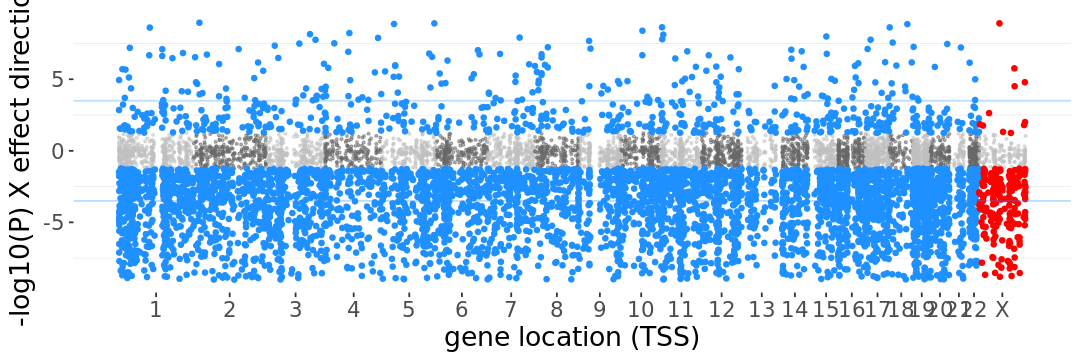

In [105]:
# Prepare the dataset
don <- df %>%   
  # Compute chromosome size
  group_by(CHR) %>% 
  summarise(chr_len = max(TSS)) %>% 
  # Calculate cumulative position of each chromosome
  dplyr::mutate(tot = cumsum(chr_len) - chr_len) %>%
  select(-chr_len) %>%  
  # Add this info to the initial dataset
  left_join(df, ., by = c("CHR" = "CHR")) %>%  
  # Add a cumulative position of each SNP
  dplyr::arrange(CHR, TSS) %>%
  dplyr::mutate( BPcum = TSS + tot) %>%
  # Add highlight and annotation information
  dplyr::mutate( is_highlight1 = ifelse(feature_id %in% featuresOfInterestNotX, "yes", "no")) %>%
  dplyr::mutate( is_highlight2 = ifelse(feature_id %in% featuresOfInterestX, "yes", "no")) %>%
  dplyr::mutate( is_highlight3 = ifelse(feature_id %in% featuresOfInterestMarkers, "yes", "no")) %>%
  # Filter SNP to make the plot lighter
  dplyr::filter(-log10(pval) > 0)
  
# Prepare X axis
axisdf <- don %>% group_by(CHR) %>% summarize(center =( max(BPcum) + min(BPcum) ) / 2 )

# head(don)
# Prepare text description for each SNP:
# don$text <- paste("SNP: ", don$SNP, "\nPosition: ", don$BP, "\nChromosome: ", don$CHR, "\nLOD score:", -log10(don$P) %>% round(2), "\nWhat else do you wanna know", sep="")

# Make the plot
p <- ggplot(don, aes(x = BPcum, y = -log10(pval)*sign(coefficient), text = "")) +
    
    # Show all points
    geom_point( aes(color = as.factor(CHR)), alpha = 0.5, size = 0.5) +
    scale_color_manual(values = rep(c("grey75", "dimgrey"), 22 )) +
    
    # custom X axis:
    scale_x_continuous( label = axisdf$CHR, breaks = axisdf$center ) +
    scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
    ylim(-9,9)+ 
    xlab("gene location (TSS)") +
    ylab("-log10(P) X effect direction") +

    # Add highlighted points
    geom_point(data = subset(don, is_highlight1 == "yes"), col = "dodgerblue", size = 1.2) +
    geom_point(data = subset(don, is_highlight2 == "yes"), col = "red", size = 1.2) +
#     geom_point(data = subset(don, is_highlight3 == "yes"), col = "green", size = 3) +
    
    # Add significance threshold
    geom_hline(yintercept = 3.5, alpha = 0.3, col = "dodgerblue") +
    geom_hline(yintercept = -3.5, alpha = 0.3, col = "dodgerblue") +
    
    # Custom the theme:
    theme_bw() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_blank(),
      text = element_text(size = 16)
    ) 
p

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 642 rows containing missing values (geom_point).”Warning message:
“Removed 625 rows containing missing values (geom_point).”Warning message:
“Removed 17 rows containing missing values (geom_point).”

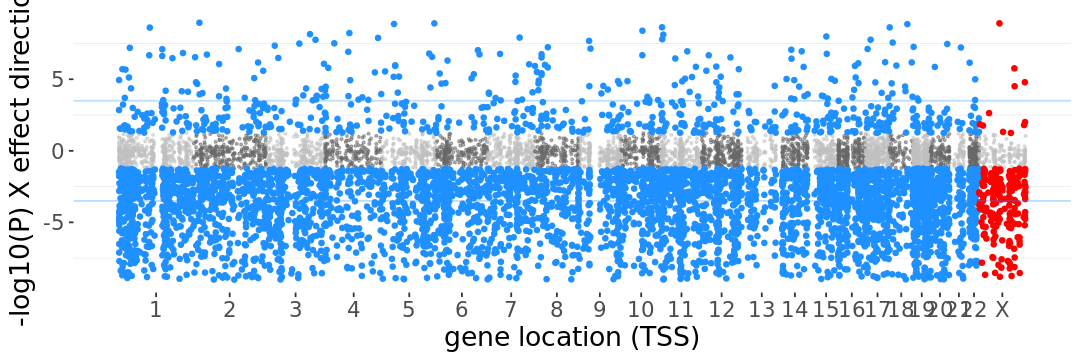

In [106]:
# Prepare the dataset
don <- df %>%   
  # Compute chromosome size
  group_by(CHR) %>% 
  summarise(chr_len = max(TSS)) %>% 
  # Calculate cumulative position of each chromosome
  dplyr::mutate(tot = cumsum(chr_len) - chr_len) %>%
  select(-chr_len) %>%  
  # Add this info to the initial dataset
  left_join(df, ., by = c("CHR" = "CHR")) %>%  
  # Add a cumulative position of each SNP
  dplyr::arrange(CHR, TSS) %>%
  dplyr::mutate( BPcum = TSS + tot) %>%
  # Add highlight and annotation information
  dplyr::mutate( is_highlight1 = ifelse(feature_id %in% featuresOfInterestNotX, "yes", "no")) %>%
  dplyr::mutate( is_highlight2 = ifelse(feature_id %in% featuresOfInterestX, "yes", "no")) %>%
  dplyr::mutate( is_highlight3 = ifelse(feature_id %in% featuresOfInterestMarkers, "yes", "no")) %>%
  # Filter SNP to make the plot lighter
  dplyr::filter(-log10(pval) > 0)
  
# Prepare X axis
axisdf <- don %>% group_by(CHR) %>% summarize(center =( max(BPcum) + min(BPcum) ) / 2 )

# head(don)
# Prepare text description for each SNP:
# don$text <- paste("SNP: ", don$SNP, "\nPosition: ", don$BP, "\nChromosome: ", don$CHR, "\nLOD score:", -log10(don$P) %>% round(2), "\nWhat else do you wanna know", sep="")

# Make the plot
p <- ggplot(don, aes(x = BPcum, y = -log10(pval)*sign(coefficient), text = "")) +
    
    # Show all points
    geom_point( aes(color = as.factor(CHR)), alpha = 0.5, size = 0.5) +
    scale_color_manual(values = rep(c("grey75", "dimgrey"), 22 )) +
    
    # custom X axis:
    scale_x_continuous( label = axisdf$CHR, breaks = axisdf$center ) +
    scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
    ylim(-9,9)+ 
    xlab("gene location (TSS)") +
    ylab("-log10(P) X effect direction") +

    # Add highlighted points
    geom_point(data = subset(don, is_highlight1 == "yes"), col = "dodgerblue", size = 1.2) +
    geom_point(data = subset(don, is_highlight2 == "yes"), col = "red", size = 1.2) +
#     geom_point(data = subset(don, is_highlight3 == "yes"), col = "green", size = 3) +
    
    # Add significance threshold
    geom_hline(yintercept = 3.5, alpha = 0.3, col = "dodgerblue") +
    geom_hline(yintercept = -3.5, alpha = 0.3, col = "dodgerblue") +
    
    # Custom the theme:
    theme_bw() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_blank(),
      text = element_text(size = 16)
    ) 
p

In [107]:
df[df$corr_pval < 0.1 & df$chromosome_name != "X","gene1"]

[1] "CYP2S1"      "EPCAM"       "SPINT2"      "NPM1"        "DMKN"       
   [6] "LECT1"       "SMPDL3B"     "TDGF1"       "TERF1"       "TUBA4A"     
  [11] "SFRP2"       "LIN28A"      "SLC16A1"     "USP44"       "VRTN"       
  [16] "L1TD1"       "CDH6"        "KRT19"       "CLU"         "PMP22"      
  [21] "CDH3"        "PODXL"       "LCK"         "SPINT1"      "CDCA7L"     
  [26] "UCHL1"       "CLDN10"      "SERBP1"      "GPR176"      "MRPL3"      
  [31] "SCG3"        "PRSS8"       "C1QBP"       "ANKRD1"      "TARS"       
  [36] "PRIM1"       "RABGAP1L"    "TMEM125"     "MAL2"        "RSL1D1"     
  [41] "PAICS"       "ZSCAN10"     "CDH2"        "UNG"         "DPH2"       
  [46] "HSP90AB1"    "PYCARD"      "TMEM88"      "RUVBL1"      "CDYL"       
  [51] "ZEB1"        "RNF167"      "MTHFD1"      "PPM1G"       "RAB34"      
  [56] "MRPL10"      "PDCD2L"      "COA4"        "RPL22L1"     "KRTCAP3"    
  [61] "EPHX3"       "GARS"        "ADSL"        "CTSC"        "SNAI2"      
  [66] "NME1"        "EIF3G"       "EEF1E1"      "IMP3"        "TRBC2"      
  [71] "ARG2"        "EXOSC5"      "DNMT3B"      "EIF6"        "AHCY"       
  [76] "CALB1"       "SSB"         "CKMT1A"      "ALG3"        "CDH11"      
  [81] "ENO1"        "ST8SIA4"     "ATIC"        "PSMC4"       "NUDT16L1"   
  [86] "DCUN1D5"     "SLC29A1"     "LARP7"       "PSMA2"       "PGAP2"      
  [91] "EIF3M"       "LYAR"        "JMJD1C"      "PTPMT1"      "MRPS26"     
  [96] "G6PC3"       "MRPS2"       "YAF2"        "DCAF13"      "GNPDA1"     
 [101] "MGST1"       "NOB1"        "FAM46B"      "FBN2"        "SALL4"      
 [106] "MRPL15"      "PRDX1"       "OIP5"        "HRSP12"      "RHOB"       
 [111] "SPIB"        "TEAD4"       "CCT7"        "POP7"        "DNAJC19"    
 [116] "RBM27"       "PTGES3"      "RASGRP2"     "MCM5"        "JADE1"      
 [121] "C2orf47"     "UBE2L6"      "HMGA1"       "KCTD14"      "TSFM"       
 [126] "UBL7"        "PHC1"        "SLIRP"       "EXOSC7"      "ESRP1"      
 [131] "CAMK2D"      "UMPS"        "UGT3A2"      "AIMP2"       "PHGDH"      
 [136] "NOP16"       "NMRK2"       "PMEL"        "RPP40"       "IMP4"       
 [141] "ALG1"        "NOL7"        "FKBP4"       "PRMT5"       "CKMT1B"     
 [146] "YARS"        "BCCIP"       "CDC20"       "LSM6"        "GMDS"       
 [151] "SHISA5"      "ACAA2"       "NIFK"        "SRSF2"       "MRPS23"     
 [156] "MAPKAPK3"    "MRPS34"      "THYN1"       "NUP35"       "LUM"        
 [161] "TFDP2"       "FHL2"        "ICT1"        "MARC1"       "PLA2G12A"   
 [166] "NME3"        "ALDOC"       "RAN"         "ARL4A"       "RSL24D1"    
 [171] "AURKB"       "PEBP1"       "PHB2"        "RNASEH2B"    "SSBP1"      
 [176] "ENOPH1"      "LDHB"        "TSR1"        "THY1"        "DDX25"      
 [181] "PSMB10"      "CACYBP"      "GALNT14"     "LITAF"       "MRPL16"     
 [186] "METTL8"      "WDR12"       "SF3A3"       "WLS"         "ZWINT"      
 [191] "MAP7"        "CNFN"        "COX7C"       "AKIRIN1"     "TBPL1"      
 [196] "NOLC1"       "PCNA"        "SAAL1"       "SNRPC"       "PUS3"       
 [201] "EBNA1BP2"    "C14orf166"   "PALLD"       "DNAJC2"      "RPF2"       
 [206] "FOXA3"       "AKR1B1"      "MFSD2A"      "BUB1"        "GAL3ST3"    
 [211] "ZNF259"      "PPIL1"       "VSNL1"       "IDO1"        "CCDC86"     
 [216] "SCO1"        "OAZ2"        "SWSAP1"      "UGP2"        "NOP56"      
 [221] "TNNT1"       "LTA4H"       "HSPD1"       "OLFM2"       "RHOBTB3"    
 [226] "SNRPN"       "SNRPB"       "POLR1C"      "BCAM"        "DESI1"      
 [231] "NOL11"       "MYL4"        "BOLA3"       "CHST4"       "SDAD1"      
 [236] "CRB3"        "COL5A1"      "NTHL1"       "SMARCE1"     "COA7"       
 [241] "EIF4EBP1"    "RFC3"        "CLNS1A"      "ECE2"        "TPST2"      
 [246] "ASNA1"       "SPRYD4"      "HESX1"       "EFNA2"       "RFXANK"     
 [251] "NR2F6"       "FABP5"       "SYNJ2BP"     "PHAX"        "FZD7"       
 [256] "WDR77"       "HNRNPC"      "LSR"         "CHCHD3"      "IRF3"       

In [108]:
df = df[df$chromosome_name == "X",]

In [109]:
nrow(df[df$corr_pval < 0.1,])
nrow(df[df$bonf_pval < 0.1,])

[1] 216

[1] 65

In [110]:
nrow(df)

[1] 373

Warning message:
“Removed 35 rows containing missing values (geom_point).”Warning message:
“Removed 35 rows containing missing values (geom_point).”

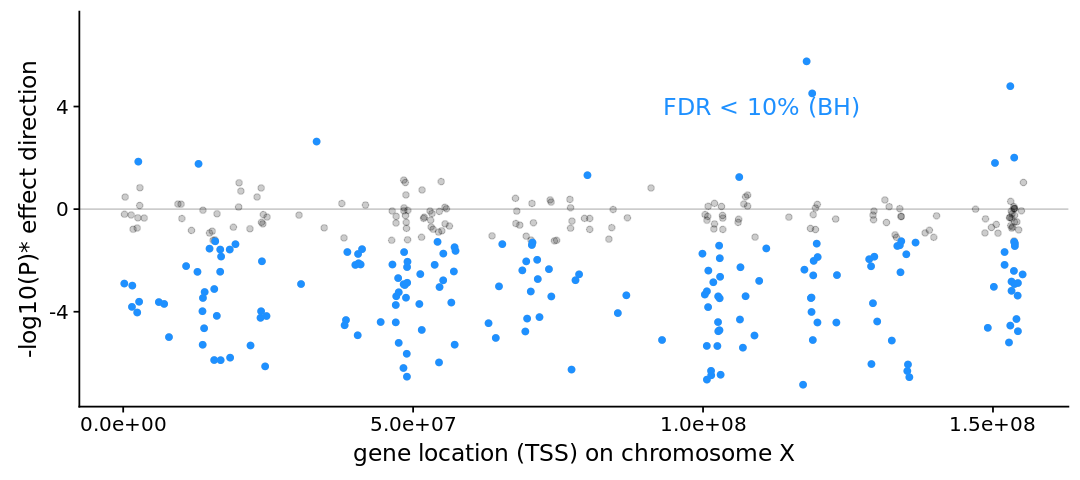

In [111]:
options(repr.plot.width = 9, repr.plot.height = 4)
p = ggplot(df, aes(x = TSS, y = -log10(pval)*sign(coefficient)))
p = p + geom_hline(yintercept = 0, alpha = 0.2)
p = p + geom_point(alpha = 0.2)
p = p + xlab("gene location (TSS) on chromosome X") + ylab("-log10(P)* effect direction")
p = p + ylim(c(-7,7))
p = p + geom_point(aes(x = TSS, y = -log10(pval)*sign(coefficient)), colour = "dodgerblue", 
                   data = dplyr::filter(df, corr_pval < 0.1))
p = p + annotate("text", x = 1.1e+8, y = 4, label = "FDR < 10% (BH)", col = "dodgerblue", size = 5)
p

Warning message:
“Removed 35 rows containing missing values (geom_point).”Warning message:
“Removed 35 rows containing missing values (geom_point).”

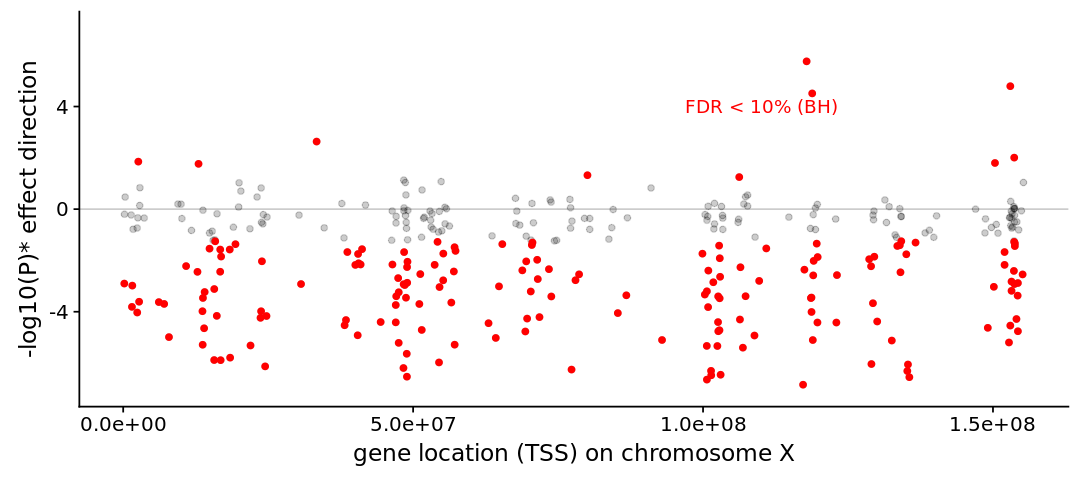

In [112]:
options(repr.plot.width = 9, repr.plot.height = 4)
p = ggplot(df, aes(x = TSS, y = -log10(pval)*sign(coefficient)))
p = p + geom_hline(yintercept = 0, alpha = 0.2)
p = p + geom_point(alpha = 0.2)
p = p + xlab("gene location (TSS) on chromosome X") + ylab("-log10(P)* effect direction")
p = p + ylim(c(-7,7))
p = p + geom_point(aes(x = TSS, y = -log10(pval)*sign(coefficient)), colour = "red", 
                   data = dplyr::filter(df, corr_pval < 0.1))
p = p + annotate("text", x = 1.1e+8, y = 4, label = "FDR < 10% (BH)", col = "red")
p

In [113]:
## addressing circularity

In [1]:
predict_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results.transcriptome_wide_scan_pseudotime.tsv"
predict = read.csv(predict_filename, sep = "\t")
head(predict)

timepoint1 gene1                timepoint2 gene2      coefficient
1 day1       princ_curve_scaled01 day1       pseudotime 1.1162632  
2 day2       princ_curve_scaled01 day2       pseudotime 0.9952129  
3 day0       princ_curve_scaled01 day0       pseudotime 0.8314005  
4 day1       princ_curve_frac     day1       pseudotime 0.1901435  
5 day2       pseudotime_frac      day2       pseudotime 0.4731245  
6 day2       princ_curve_frac     day2       pseudotime 0.5812520  
  pval        
1 2.591249e-87
2 6.260132e-74
3 4.829511e-63
4 7.754403e-60
5 1.293367e-47
6 8.365894e-43

In [2]:
predict_day3 = predict[predict$timepoint1 == "day3",]
head(predict_day3)

timepoint1 gene1                timepoint2 gene2      coefficient
8  day3       princ_curve_scaled01 day3       pseudotime  0.76523978
10 day3       pseudotime_frac      day3       pseudotime  0.58999152
17 day3       RHOBTB3              day3       pseudotime  0.05337789
18 day3       princ_curve_frac     day3       pseudotime  0.59271735
20 day3       CER1                 day3       pseudotime  0.05226450
33 day3       OLFML3               day3       pseudotime -0.09041347
   pval        
8  5.401783e-40
10 1.564702e-37
17 1.704719e-33
18 1.941406e-32
20 6.292104e-31
33 1.771870e-27

In [3]:
predict_day0 = predict[predict$timepoint1 == "day0",]
predict_day0$corr_pval = p.adjust(predict_day0$pval, method = "BH")

In [4]:
predict_day0.sign = predict_day0[predict_day0$corr_pval < 0.1,]
nrow(predict_day0.sign)

[1] 9218

In [5]:
predict_day0.sign$gene1

[1] princ_curve_scaled01                 CYP2S1                              
   [3] EPCAM                                SPINT2                              
   [5] NPM1                                 DMKN                                
   [7] LECT1                                SMPDL3B                             
   [9] SLC7A3                               TDGF1                               
  [11] TERF1                                TUBA4A                              
  [13] SFRP2                                LIN28A                              
  [15] SLC16A1                              USP44                               
  [17] VRTN                                 L1TD1                               
  [19] SLC38A5                              CDH6                                
  [21] KRT19                                CLU                                 
  [23] PMP22                                CDH3                                
  [25] PODXL                                LCK                                 
  [27] SPINT1                               CDCA7L                              
  [29] UCHL1                                CLDN10                              
  [31] SERBP1                               GPR176                              
  [33] princ_curve_frac                     MRPL3                               
  [35] SCG3                                 PRSS8                               
  [37] C1QBP                                ANKRD1                              
  [39] respiration                          TARS                                
  [41] PRIM1                                RABGAP1L                            
  [43] TMEM125                              MAL2                                
  [45] RSL1D1                               PAICS                               
  [47] ZSCAN10                              CDH2                                
  [49] UNG                                  DPH2                                
  [51] HSP90AB1                             PYCARD                              
  [53] TMEM88                               RUVBL1                              
  [55] CDYL                                 ZEB1                                
  [57] RNF167                               MTHFD1                              
  [59] PPM1G                                RAB34                               
  [61] MRPL10                               DKC1                                
  [63] PDCD2L                               COA4                                
  [65] RPL22L1                              KRTCAP3                             
  [67] EPHX3                                G2_M_transition                     
  [69] GARS                                 ADSL                                
  [71] G1_S_transition                      CTSC                                
  [73] SNAI2                                NME1                                
  [75] EIF3G                                EEF1E1                              
  [77] IMP3                                 TRBC2                               
  [79] ARG2                                 EXOSC5                              
  [81] DNMT3B                               EIF6                                
  [83] AHCY                                 CALB1                               
  [85] SSB                                  CKMT1A                              
  [87] ALG3                                 CDH11                               
  [89] ENO1                                 ST8SIA4                             
  [91] ATIC                                 PSMC4                               
  [93] NUDT16L1                             DCUN1D5                             
  [95] SLC29A1                              LARP7                               
  [97] PSMA2                                PGAP2                               
  [99] EIF3M                      

In [6]:
tests = predict[predict$gene1 %in% predict_day0.sign$gene1,]

In [7]:

tests0 = tests[tests$timepoint1 == "day0" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests1 = tests[tests$timepoint1 == "day1" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests2 = tests[tests$timepoint1 == "day2" &  tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]

In [8]:
df0 = inner_join(tests0, tests1, by = c("gene1","timepoint2","gene2"), suffix = c(".day0",".day1"))
df = inner_join(df0, tests2, by = c("gene1","timepoint2","gene2"))
colnames(df)[(ncol(df)-2):ncol(df)] <- c("timepoint1.day2","coefficient.day2","pval.day2")
head(df)

ERROR: Error in inner_join(tests0, tests1, by = c("gene1", "timepoint2", "gene2"), : could not find function "inner_join"


In [9]:
mat = -log10(df[,c("pval.day0","pval.day1","pval.day2")])*sign(df[,c("coefficient.day0","coefficient.day1","coefficient.day2")])
rownames(mat) = df$gene1
colnames(mat) = c("day0", "day1", "day2")
t(mat)

ERROR: Error in df[, c("pval.day0", "pval.day1", "pval.day2")]: object of type 'closure' is not subsettable


In [10]:
library(colorspace)

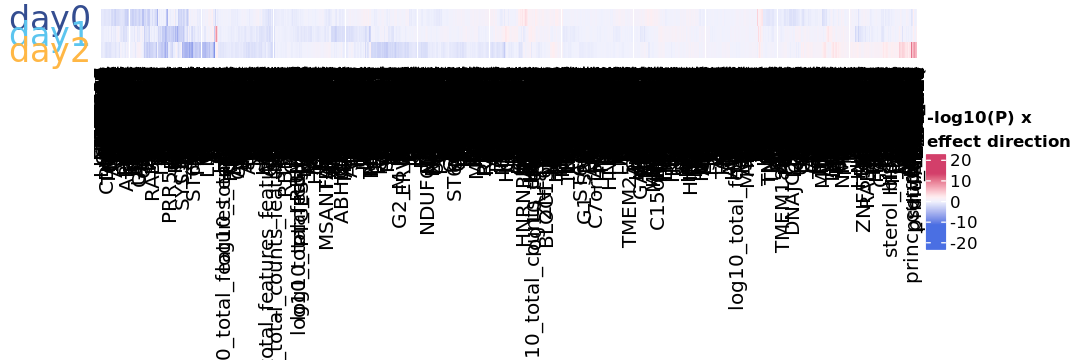

In [124]:
options(repr.plot.width = 9, repr.plot.height = 3)
Heatmap(t(mat), 
        show_row_dend = F, show_column_dend = F, 
        show_column_names = T, show_row_names = T, 
        cluster_rows = F,  row_names_side = "left",
        name = "-log10(P) x \neffect direction",
        row_names_gp = gpar(col = c("#344d90", "#5cc5ef","#ffb745"), fontsize = 20),
        col = diverge_hcl(12, c = 100, l = c(50,100), power = 1))

In [11]:
new_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/tables_for_anna_Aug2019/"

In [12]:
predict_filename = paste0(new_folder,"pseudotime_association_tests_transcriptome_wide_all_day_combinations.tsv")
predict = read.csv(predict_filename, sep = "\t")
head(predict)

timepoint1 gene1                timepoint2 gene2      coefficient
1 day1       princ_curve_scaled01 day1       pseudotime 1.1162632  
2 day2       princ_curve_scaled01 day2       pseudotime 0.9952129  
3 day0       princ_curve_scaled01 day0       pseudotime 0.8314005  
4 day1       princ_curve_frac     day1       pseudotime 0.1901435  
5 day2       pseudotime_frac      day2       pseudotime 0.4731245  
6 day2       princ_curve_frac     day2       pseudotime 0.5812520  
  pval        
1 2.591249e-87
2 6.260132e-74
3 4.829511e-63
4 7.754403e-60
5 1.293367e-47
6 8.365894e-43

In [13]:
# There is now a complete set of data for every day vs. every other day for every gene. 
# So, for example, it is now possible to look up the association of our genes on day3 with pseudotime on day3 
# (previously I was only testing previous days for association with pseudotime on day3). 

In [14]:
# It is also possible to look up the association of our genes on day0 with pseudotime on day0, day1, day2, day3.
# This should allow us to address the question of 'circularity' in our reasoning.

In [15]:
predict_day0 = predict[predict$timepoint1 == "day0" & predict$timepoint2 == "day3",]
predict_day0$corr_pval = p.adjust(predict_day0$pval, method = "BH")

In [16]:
## identify significant genes
predict_day0.sign = predict_day0[predict_day0$corr_pval < 0.1,]
genes_sign = predict_day0.sign$gene1

In [17]:
predict_day0.sign = predict_day0[predict_day0$corr_pval < 1,]
nrow(predict_day0.sign)

[1] 11252

In [18]:
 predict_day0.sign$gene1

[1] GRPR                                
    [2] ZDHHC9                              
    [3] GPM6B                               
    [4] TMEM47                              
    [5] MOSPD2                              
    [6] FAM92A1                             
    [7] CDKN1A                              
    [8] CUL4B                               
    [9] C16orf74                            
   [10] PPP1R15A                            
   [11] TEP1                                
   [12] APOO                                
   [13] ARIH1                               
   [14] RAB9A                               
   [15] MBTPS2                              
   [16] HERC2                               
   [17] SMS                                 
   [18] TBX6                                
   [19] CRABP2                              
   [20] SMARCA1                             
   [21] MMGT1                               
   [22] TMSB4X                              
   [23] RNF34                               
   [24] PPP3CC                              
   [25] TMED9                               
   [26] PGM1                                
   [27] AP1S2                               
   [28] ALG13                               
   [29] ZFYVE1                              
   [30] GDF15                               
   [31] C5AR1                               
   [32] PCDH1                               
   [33] RNF19A                              
   [34] ZNF573                              
   [35] KCTD20                              
   [36] CDK16                               
   [37] ARMCX4                              
   [38] RAB11B                              
   [39] SYAP1                               
   [40] STAG2                               
   [41] C12orf76                            
   [42] TAPT1                               
   [43] FURIN                               
   [44] CEP112                              
   [45] RASSF8                              
   [46] SKP1                                
   [47] PLS3                                
   [48] TRAV8.5                             
   [49] CXorf38                             
   [50] CA5B                                
   [51] CALCOCO2                            
   [52] GFPT1                               
   [53] UBA1                                
   [54] TIAM1                               
   [55] BRD8                                
   [56] HMGN5                               
   [57] FAM127C                             
   [58] BCL7A                               
   [59] GEMIN8                              
   [60] PIR                                 
   [61] C1GALT1C1                           
   [62] TBC1D22B                            
   [63] SMARCA4                             
   [64] CXorf56                             
   [65] MPP6                                
   [66] DIAPH2                              
   [67] LAMP2                               
   [68] OBFC1                               
   [69] RAB3B                               
   [70] CXorf23                             
   [71] PCSK9                               
   [72] PABPN1                              
   [73] CC2D1B                              
   [74] COPB2                               
   [75] NBPF9                               
   [76] TMSB4XP8                            
   [77] RSPH3                               
   [78] TSC22D3                             
   [79] TNFAIP8                             
   [80] CCNH                                
   [81] EPHA2                               
   [82] DMD                                 
   [83] PFAS                                
   [84] GJA1                                
   [85] KLHL24                              
   [86] COMMD5                              
   [87] RPGR                                
   [88] FAM105B                             
   [89] ATP6V0E2                            

In [19]:
tests = predict[predict$gene1 %in% predict_day0.sign$gene1,]
tests = tests[tests$timepoint1 == "day0",]

In [20]:
tests0 = tests[tests$timepoint2 == "day0" & tests$gene2 == "pseudotime",]
tests1 = tests[tests$timepoint2 == "day1" & tests$gene2 == "pseudotime",]
tests2 = tests[tests$timepoint2 == "day2" & tests$gene2 == "pseudotime",]
tests3 = tests[tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]

In [21]:
head(tests0,2)
head(tests1,2)
head(tests2,2)
head(tests3,2)

timepoint1 gene1                timepoint2 gene2      coefficient
3 day0       princ_curve_scaled01 day0       pseudotime  0.83140050
7 day0       CYP2S1               day0       pseudotime -0.04932352
  pval        
3 4.829511e-63
7 8.448044e-41

timepoint1 gene1  timepoint2 gene2      coefficient pval        
543  day0       DIAPH2 day1       pseudotime -0.02891828 7.724612e-13
1059 day0       PIM2   day1       pseudotime -0.03769878 1.291131e-10

timepoint1 gene1  timepoint2 gene2      coefficient pval        
1591 day0       C5AR1  day2       pseudotime -0.06245280 2.776220e-09
1996 day0       KLHL24 day2       pseudotime -0.08556448 1.230965e-08

timepoint1 gene1  timepoint2 gene2      coefficient pval        
3888 day0       GRPR   day3       pseudotime -0.06123211 8.675658e-07
4069 day0       ZDHHC9 day3       pseudotime -0.04286353 1.130310e-06

In [30]:
library(dplyr)
library(ggplot2)
library(ggthemes)

In [31]:
df0 = inner_join(tests0, tests1, by = c("gene1","timepoint1","gene2"), suffix = c(".day0",".day1"))
head(df0,2)
df1 = inner_join(df0, tests2, by = c("gene1","timepoint1","gene2"))
colnames(df1)[(ncol(df1)-2):ncol(df1)] <- c("timepoint1.day2","coefficient.day2","pval.day2")
head(df1,2)
df2 = inner_join(df1, tests3, by = c("gene1","timepoint1","gene2"))
colnames(df2)[(ncol(df2)-2):ncol(df2)] <- c("timepoint1.day3","coefficient.day3","pval.day3")
head(df2,2)

timepoint1 gene1                timepoint2.day0 gene2      coefficient.day0
1 day0       princ_curve_scaled01 day0            pseudotime  0.83140050     
2 day0       CYP2S1               day0            pseudotime -0.04932352     
  pval.day0    timepoint2.day1 coefficient.day1 pval.day1   
1 4.829511e-63 day1             0.45508777      1.237641e-06
2 8.448044e-41 day1            -0.02629216      1.454259e-05

timepoint1 gene1                timepoint2.day0 gene2      coefficient.day0
1 day0       princ_curve_scaled01 day0            pseudotime  0.83140050     
2 day0       CYP2S1               day0            pseudotime -0.04932352     
  pval.day0    timepoint2.day1 coefficient.day1 pval.day1    timepoint1.day2
1 4.829511e-63 day1             0.45508777      1.237641e-06 day2           
2 8.448044e-41 day1            -0.02629216      1.454259e-05 day2           
  coefficient.day2 pval.day2 
1  0.27950749      0.07891047
2 -0.01873341      0.07106867

timepoint1 gene1                timepoint2.day0 gene2      coefficient.day0
1 day0       princ_curve_scaled01 day0            pseudotime  0.83140050     
2 day0       CYP2S1               day0            pseudotime -0.04932352     
  pval.day0    timepoint2.day1 coefficient.day1 pval.day1    timepoint1.day2
1 4.829511e-63 day1             0.45508777      1.237641e-06 day2           
2 8.448044e-41 day1            -0.02629216      1.454259e-05 day2           
  coefficient.day2 pval.day2  timepoint1.day3 coefficient.day3 pval.day3
1  0.27950749      0.07891047 day3            -0.13141366      0.2759108
2 -0.01873341      0.07106867 day3             0.01156334      0.1387584

In [32]:
# mat = -log10(df2[,
#                 c("pval.day0","pval.day1","pval.day2","pval.day3")])*sign(df2[,
#                                 c("coefficient.day0","coefficient.day1","coefficient.day2","coefficient.day3")])
# rownames(mat) = df2$gene1
# colnames(mat) = c("day0", "day1", "day2","day3")
# t(mat)

In [33]:
canva_pal("Pool party")(4)

[1] "#344d90" "#5cc5ef" "#ffb745" "#e7552c"

In [34]:
# options(repr.plot.width = 9, repr.plot.height = 3)
# Heatmap(t(mat), 
#         show_row_dend = F, show_column_dend = F, 
#         show_column_names = T, show_row_names = T, 
#         cluster_rows = F,  row_names_side = "left",
#         name = "-log10(P) x \neffect direction",
#         row_names_gp = gpar(col = c("#344d90", "#5cc5ef","#ffb745","#e7552c"), fontsize = 20),
#         col = diverge_hcl(12, c = 100, l = c(50,100), power = 1))

In [35]:
tests = predict[predict$gene1 %in% predict_day0.sign$gene1,]
tests_0 = tests[tests$timepoint1 == "day0" & tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]
tests_3 = tests[tests$timepoint1 == "day3" & tests$timepoint2 == "day3" & tests$gene2 == "pseudotime",]

In [36]:
df = inner_join(tests_0, tests_3, by = "gene1", suffix = c(".day0",".day3"))
head(df,2)

timepoint1.day0 gene1  timepoint2.day0 gene2.day0 coefficient.day0
1 day0            GRPR   day3            pseudotime -0.06123211     
2 day0            ZDHHC9 day3            pseudotime -0.04286353     
  pval.day0    timepoint1.day3 timepoint2.day3 gene2.day3 coefficient.day3
1 8.675658e-07 day3            day3            pseudotime -0.003454997    
2 1.130310e-06 day3            day3            pseudotime -0.014860659    
  pval.day3 
1 0.41808198
2 0.00410601

In [37]:
# mat = -log10(df[,c("pval.day0","pval.day3")])*sign(df[,c("coefficient.day0","coefficient.day3")])
# rownames(mat) = df$gene1
# colnames(mat) = c("day0","day3")

In [38]:
# options(repr.plot.width = 9, repr.plot.height = 2.5)
# Heatmap(t(mat), 
#         show_row_dend = F, show_column_dend = F, 
#         show_column_names = T, show_row_names = T, 
#         cluster_rows = F,  row_names_side = "left",
#         name = "-log10(P) x \neffect direction",
#         row_names_gp = gpar(col = c("#344d90","#e7552c"), fontsize = 20),
#         col = diverge_hcl(12, c = 100, l = c(50,100), power = 1))

In [39]:
colnames(df)

[1] "timepoint1.day0"  "gene1"            "timepoint2.day0"  "gene2.day0"      
 [5] "coefficient.day0" "pval.day0"        "timepoint1.day3"  "timepoint2.day3" 
 [9] "gene2.day3"       "coefficient.day3" "pval.day3"

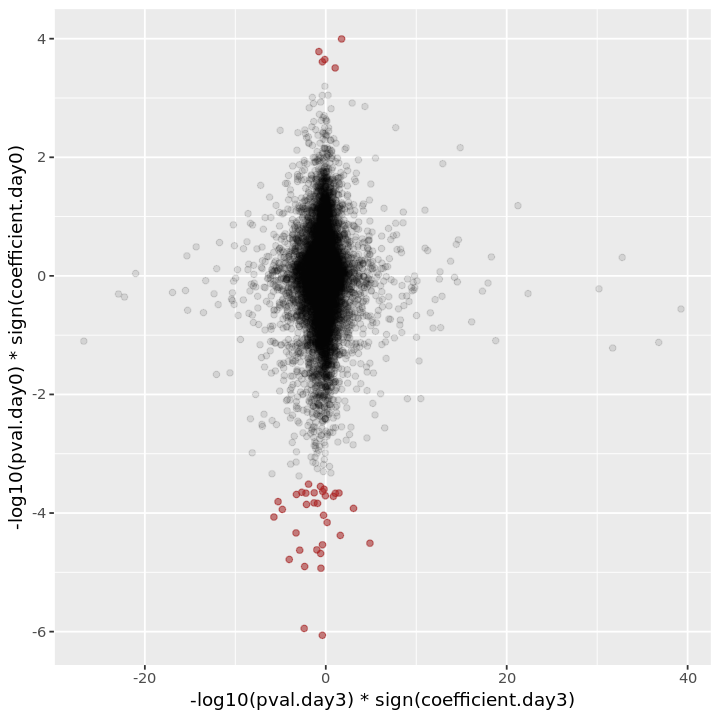

In [40]:
options(repr.plot.width = 6, repr.plot.height = 6)
df2 = df[,c("pval.day0","pval.day3","gene1","coefficient.day0","coefficient.day3")]
ggplot(df2, aes(x = -log10(pval.day3)*sign(coefficient.day3), y = -log10(pval.day0)*sign(coefficient.day0))) + 
    geom_point(alpha = 0.1) + #ylim(c(0,6)) +
    geom_point(aes(x = -log10(pval.day3)*sign(coefficient.day3), y = -log10(pval.day0)*sign(coefficient.day0)), 
               data = df2[df2$gene1 %in% genes_sign,], col = "firebrick", alpha = 0.5) 

In [41]:
genes_sign

[1] GRPR     ZDHHC9   GPM6B    TMEM47   MOSPD2   FAM92A1  CDKN1A   CUL4B   
 [9] C16orf74 PPP1R15A TEP1     APOO     ARIH1    RAB9A    MBTPS2   HERC2   
[17] SMS      TBX6     CRABP2   SMARCA1  MMGT1    TMSB4X   RNF34    PPP3CC  
[25] TMED9    PGM1     AP1S2    ALG13    ZFYVE1   GDF15    C5AR1    PCDH1   
[33] RNF19A   ZNF573   KCTD20   CDK16    ARMCX4   RAB11B  
11252 Levels: A1BG A4GALT AAAS AACS AADAT AAED1 AAGAB AAK1 AAMDC AAMP ... ZZZ3

In [42]:
genes_diff = c('GATA6','NANOG','EOMES','POU5F1','SOX2')

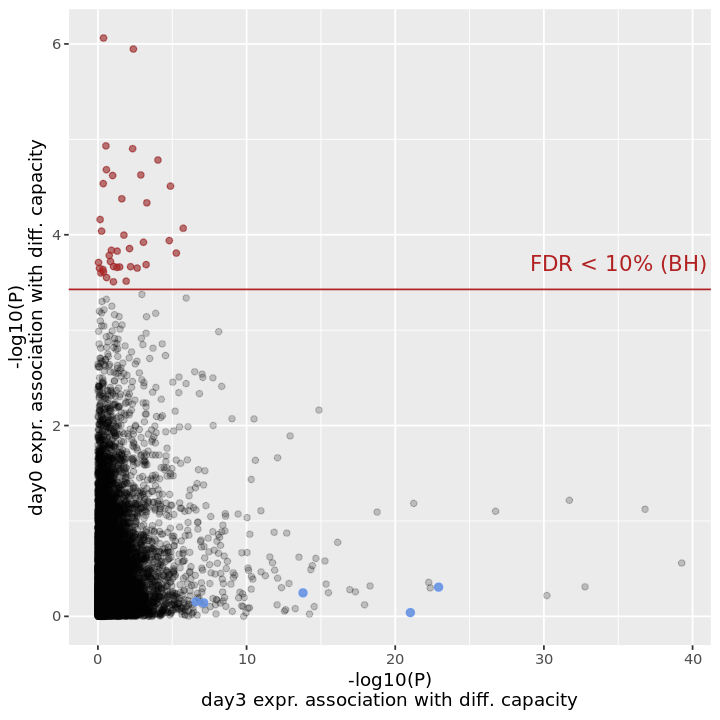

In [43]:
options(repr.plot.width = 6, repr.plot.height = 6)
df2 = df[,c("pval.day0","pval.day3","gene1")]
ggplot(df2, aes(x = -log10(pval.day3), y = -log10(pval.day0))) + 
    geom_point(alpha = 0.2) + #ylim(c(0,6)) +
    geom_point(aes(x = -log10(pval.day3), y = -log10(pval.day0)), 
               data = df2[df2$gene1 %in% genes_sign,], col = "firebrick", alpha = 0.5) + 
    geom_point(aes(x = -log10(pval.day3), y = -log10(pval.day0)), 
               data = df2[df2$gene1 %in% genes_diff,], col = "cornflowerblue", alpha = 0.8,size = 2) + 
    xlab("-log10(P)\nday3 expr. association with diff. capacity") +
    ylab("-log10(P)\nday0 expr. association with diff. capacity") +
    geom_hline(yintercept = min(-log10(df2[df2$gene1 %in% genes_sign,"pval.day0"]))-0.08, color = "firebrick") +
    annotate("text", x = 35, y = 3.7, label = "FDR < 10% (BH)", col = "firebrick", size = 4.5)

In [146]:
cor(-log10(df2$pval.day3), -log10(df2$pval.day0))

[1] 0.05503429

In [44]:
head(df2)

pval.day0    pval.day3    gene1  
1 8.675658e-07 0.4180819822 GRPR   
2 1.130310e-06 0.0041060097 ZDHHC9 
3 1.170422e-05 0.2899591674 GPM6B  
4 1.252561e-05 0.0046034990 TMEM47 
5 1.647873e-05 0.0000916573 MOSPD2 
6 2.079964e-05 0.2686772130 FAM92A1

In [49]:
Xchrom_genes = c("GRPR","ZDHHC9","GPM6B","TMEM47","MOSPD2","CUL4B","APOO","RAB9A","MBTPS2","SMS",
                 "SMARCA1","MMGT1","TMSB4X","AP1S2","ALG13","CDK16","ARMCX4")

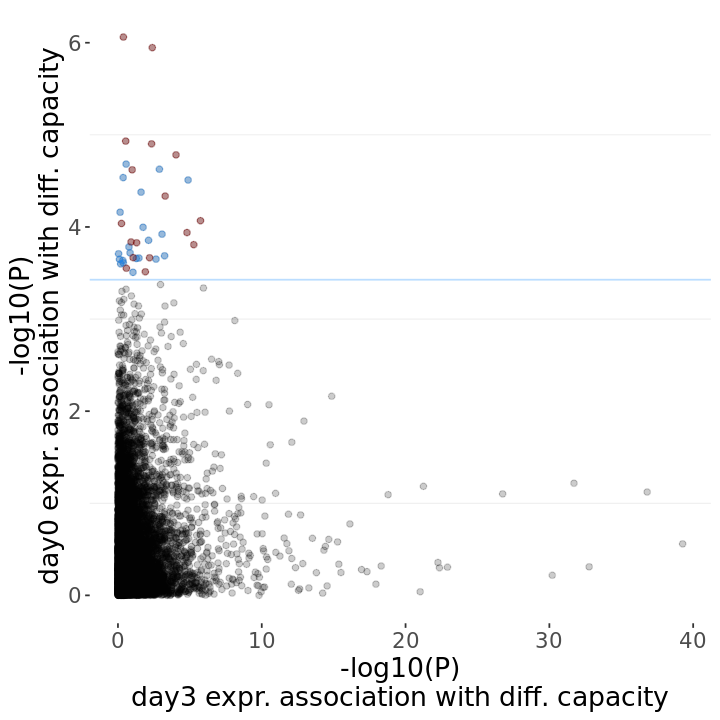

In [58]:
options(repr.plot.width = 6, repr.plot.height = 6)
df2 = df[,c("pval.day0","pval.day3","gene1")]
ggplot(df2, aes(x = -log10(pval.day3), y = -log10(pval.day0))) + 
    geom_point(alpha = 0.2) + #ylim(c(0,6)) +
    geom_point(aes(x = -log10(pval.day3), y = -log10(pval.day0)), 
               data = df2[df2$gene1 %in% genes_sign[!(genes_sign %in% Xchrom_genes)],], col = "dodgerblue", alpha = 0.3) + 
    geom_point(aes(x = -log10(pval.day3), y = -log10(pval.day0)), 
               data = df2[df2$gene1 %in% Xchrom_genes,], col = "darkred", alpha = 0.3) + 
    xlab("-log10(P)\nday3 expr. association with diff. capacity") +
    ylab("-log10(P)\nday0 expr. association with diff. capacity") +
    geom_hline(yintercept = min(-log10(df2[df2$gene1 %in% genes_sign,"pval.day0"]))-0.08, color = "dodgerblue", alpha = 0.3) +
#     annotate("text", x = 35, y = 3.7, label = "FDR < 10% (BH)", col = "firebrick", size = 4.5)
    theme_bw() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_blank(),
      text = element_text(size = 16)
    )